Object:- WAP To build and evaluate a Convolutional Neural Network (CNN) using Keras library to classify mnist fashion dataset.Demonstrate the effect of filter size, regularization, batch size and optimization algorithm on model performance.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [5]:
# Load Fashion MNIST Dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize and reshape data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test  = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 19s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 5s 1us/step


In [6]:
# Model builder function
def build_model(filter_size=3, reg_rate=0.0, optimizer='adam'):
    model = Sequential()
    model.add(Conv2D(32, (filter_size, filter_size), activation='relu', input_shape=(28, 28, 1),
                     kernel_regularizer=l2(reg_rate)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(reg_rate)))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    if optimizer == 'adam':
        opt = Adam()
    elif optimizer == 'sgd':
        opt = SGD()
    elif optimizer == 'rmsprop':
        opt = RMSprop()
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [7]:
# Different configurations to test
configs = [
    {'name': 'Filter 3x3', 'filter_size': 3, 'reg_rate': 0.0, 'batch_size': 64, 'optimizer': 'adam'},
    {'name': 'Filter 5x5', 'filter_size': 5, 'reg_rate': 0.0, 'batch_size': 64, 'optimizer': 'adam'},
    {'name': 'L2 Regularization', 'filter_size': 3, 'reg_rate': 0.01, 'batch_size': 64, 'optimizer': 'adam'},
    {'name': 'Small Batch Size', 'filter_size': 3, 'reg_rate': 0.0, 'batch_size': 32, 'optimizer': 'adam'},
    {'name': 'Optimizer SGD', 'filter_size': 3, 'reg_rate': 0.0, 'batch_size': 64, 'optimizer': 'sgd'},
]

# Train and evaluate models
results = []
for config in configs:
    print(f"\nTraining: {config['name']}")
    model = build_model(config['filter_size'], config['reg_rate'], config['optimizer'])
    history = model.fit(x_train, y_train, epochs=5, batch_size=config['batch_size'], verbose=0,
                        validation_data=(x_test, y_test))
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"{config['name']} - Test Accuracy: {test_acc:.4f}")
    results.append((config['name'], test_acc))




Training: Filter 3x3


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Filter 3x3 - Test Accuracy: 0.9039

Training: Filter 5x5
Filter 5x5 - Test Accuracy: 0.8939

Training: L2 Regularization
L2 Regularization - Test Accuracy: 0.8301

Training: Small Batch Size
Small Batch Size - Test Accuracy: 0.9055

Training: Optimizer SGD
Optimizer SGD - Test Accuracy: 0.8328


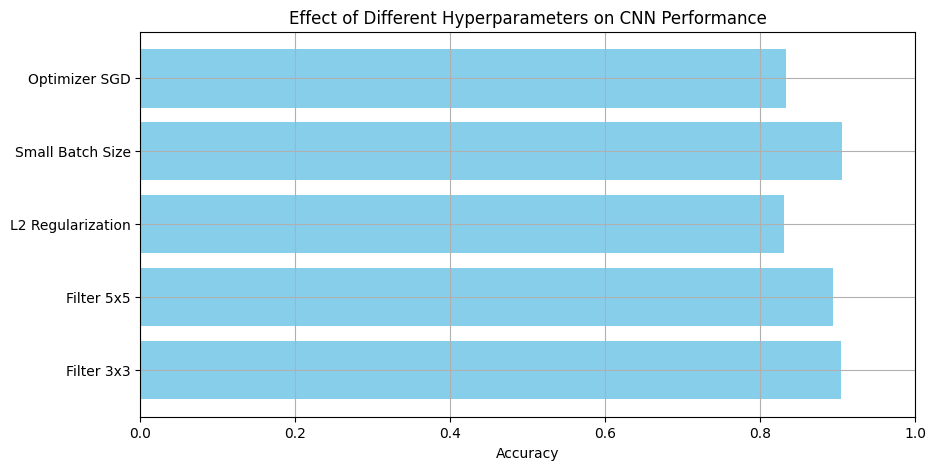

In [8]:
# Plot results
names = [r[0] for r in results]
scores = [r[1] for r in results]

plt.figure(figsize=(10,5))
plt.barh(names, scores, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Effect of Different Hyperparameters on CNN Performance")
plt.xlim(0, 1)
plt.grid(True)
plt.show()

Description of code:- 
1.Classify images from the Fashion MNIST dataset.

2.Analyze the effect of key hyperparameters: Filter Size, Regularization, Batch Size, Optimization Algorithm

3.Dataset
Fashion MNIST: 70,000 grayscale images of fashion items (28x28 pixels).
               60,000 training images.
               10,000 test images.
               10 classes such as T-shirt, Trouser, Pullover, Dress, etc.

4.CNN Architecture :
Conv2D Layer: Extract features from image using different filter sizes.

MaxPooling2D: Downsamples the feature maps.

Flatten: Converts 2D features into 1D.

Dense Layer: Fully connected layer for classification.

Dropout: Prevents overfitting.

Output Layer: 10 neurons with Softmax activation.

5.Evaluation Metrics:

Loss Function: Categorical Crossentropy,

Accuracy: Main evaluation metric,

Validation Accuracy: Used to monitor model generalization,

Test Accuracy: Final evaluation.

6.Conclusion :
CNNs are highly effective for image classification tasks like Fashion MNIST.

Tuning filter size, regularization, batch size, and optimizer significantly impacts model performance.

Best performance in this experiment was observed using:

Filter size 3x3,

Adam Optimizer,

Batch size 64,

With/without L2 depending on overfitting.

output:- Filter 3x3 - Test Accuracy: 0.9039

Training: Filter 5x5
Filter 5x5 - Test Accuracy: 0.8939

Training: L2 Regularization
L2 Regularization - Test Accuracy: 0.8301

Training: Small Batch Size
Small Batch Size - Test Accuracy: 0.9055

Training: Optimizer SGD
Optimizer SGD - Test Accuracy: 0.8328
